In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, rms)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
load(file = paste0(datapath,"capTCRseq/TRBfiles.RData"))

In [7]:
dim(file_df_dedup_trb)

[1] 603   3

In [57]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [67]:
dim(meta_div[!is.na(meta_div$TRB) & !is.na(meta_div$CD3)& meta_div$cycle == "X05" & meta_div$sampletype == "PBMC",])

[1] 40 58

In [71]:
dim(meta_div[!is.na(meta_div$FOLD) & meta_div$sampletype == "PBMC",])

[1] 485  58

In [9]:
#meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [10]:
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [11]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [12]:
# get good samples
file_df_dedup_trb <- file_df_dedup_trb[ file_df_dedup_trb$samplename %in% meta_div$basename, ]

In [13]:
dim(file_df_dedup_trb)

[1] 554   3

In [15]:
file_df_dedup_trb$Patient <- meta_div$Patient[match(file_df_dedup_trb$samplename, meta_div$basename)]

In [16]:
#replace - with _
file_df_dedup_trb$Patient <- gsub("-", "_", file_df_dedup_trb$Patient)

In [17]:
file_df_dedup_trb[ !file_df_dedup_trb$file_list %in% meta_div$file, ] # 9 files with no productive cdr3s

,file_list,samplename,size,Patient
,<chr>,<chr>,<dbl>,<chr>
17,batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt,CHP_347-01-cfDNA,1825,CHP_347
37,batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt,CHP_377-01-cfDNA,965,CHP_377
307,batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt,CHP_366-05_cfDNA,744,CHP_366
342,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt,CHP_381-05_cfDNA,1229,CHP_381
350,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt,CHP_391-02_cfDNA,811,CHP_391
351,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt,CHP_392-01_cfDNA,1289,CHP_392
359,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt,CHP_398-01_cfDNA,2330,CHP_398
409,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt,CHP_419-FFPE-DNA_S2,810,CHP_419
1148,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt,CHP_401-03_cfDNA,731,CHP_401


In [18]:
file_df_dedup_trb <- file_df_dedup_trb[ file_df_dedup_trb$file_list %in% meta_div$file, ]

In [19]:
#readr::write_rds(file_df_dedup_trb, paste0(h4hpath, "analysis/TiRP/TRBfiles_goodsamples.rds"))

In [20]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"

Tirp output

In [21]:
tirpoutfiles <- list.files(h4hpath, pattern = "tirp.csv", full.names = TRUE, recursive = T)

In [22]:
#tirpoutfiles <- tirpoutfiles[ grepl("PBMC", tirpoutfiles) ]

bind median tirp to meta_div

In [23]:
meta_div$TiRP <- NA

In [24]:
myvector <- vector("list", length(tirpoutfiles) )

for (i in 1:length(tirpoutfiles)) {
    tirpout <- read.table(tirpoutfiles[i],
        sep = ",",
        header = T, stringsAsFactors = F, row.names = 1
    )
if(nrow(tirpout) > 10) {
    myvector[i] <- median(tirpout$TiRP)
}
else {
    myvector[i] <- median(tirpout$TiRP)
}
    names(myvector)[i] <- tirpout$samplename[1]
    
}

In [25]:
head(tirpout)

,v_gene,cdr3,vgene,length,Jmotif,cdr3MR,perc_score,pos_score,vgene_score,p107_score,Jmotif_score,p113_score,length_score,total_score,vTiRP,mTiRP,jTiRP,TiRP,samplename
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,TRBV2,CASISVTMNTEAFF,TCRBV02-01,14,other,SVTM,-0.06506151,0.09802139,-0.18371367,0.00000000,0.08755235,0.00000000,-0.01902781,-0.08222925,-0.159933470,-0.10376356,0.05502848,-0.2086686,LFS_TCR-5067-PBMC-DNA
2,TRBV6-1,CASRRQEVTEAFF,TCRBV06-01,13,other,RQE,-0.15121867,0.04238840,0.12484295,0.07958403,0.08755235,0.10337216,0.00000000,0.28652122,1.481947453,-0.62306281,0.49230497,1.3511896,LFS_TCR-5067-PBMC-DNA
3,TRBV19,CASKRAGFLDNQPQHF,TCRBV19-01,16,QPQHF,RAGFLD,0.07824230,0.10238754,0.00000000,0.11303075,-0.03418246,0.00000000,0.04333654,0.30281468,1.095330581,0.78470645,-0.45992418,1.4201129,LFS_TCR-5067-PBMC-DNA
4,TRBV10-2,CASSESQSGTMGGYTF,TCRBV10-02,16,GGYTF,ESQSGT,-0.18444107,0.24748557,0.00000000,0.00000000,0.04476292,0.07685997,0.04333654,0.22800395,0.617197124,0.28730658,0.19915090,1.1036546,LFS_TCR-5067-PBMC-DNA
5,TRBV27,CASSLSLAGYNEQFF,TCRBV27-01,15,NEQFF,LSLAG,0.05051233,0.00000000,-0.08561152,0.00000000,-0.02326415,0.14335211,0.00000000,0.08498876,0.255050245,0.05097524,0.19265792,0.4986834,LFS_TCR-5067-PBMC-DNA
6,TRBV11-2,CASSLPGGDTDTQYF,TCRBV11-02,15,DTQYF,LPGGD,-0.06433656,0.06350366,-0.14794708,0.00000000,-0.02404515,0.04927728,0.00000000,-0.12354786,-0.008636562,-0.16622115,-0.20859348,-0.3834512,LFS_TCR-5067-PBMC-DNA


In [26]:
#meta_div$TiRP <- NA

In [27]:
tmp <- as.data.frame( unlist(myvector) ) 

In [28]:
meta_div$TiRP <-  tmp[ match(meta_div$basename, rownames(tmp)),1] 

In [29]:
meta_div$TiRP <- as.numeric(as.character(meta_div$TiRP))

In [30]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "TiRP"

In [31]:
meta_div$fold_group <- NA
meta_div$fold_group[meta_div$FOLD <= 2] <- "Fail (< 2 fold)"
meta_div$fold_group[meta_div$FOLD >= 5] <- "Pass (> 5 fold)"

In [32]:
tirp_pbmc <- meta_div[ !is.na(meta_div$fold_group) & meta_div$sampletype == "PBMC" & !is.na(meta_div$TiRP), ]

tirp_cfdna <- meta_div[ !is.na(meta_div$fold_group) & meta_div$sampletype == "cfDNA" & !is.na(meta_div$TiRP), ]

In [33]:
dim(tirp_pbmc)

[1] 199  60

In [48]:
p1 <- ggplot(
  data = tirp_pbmc,
  aes(x = fold_group, y = TiRP )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1.2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = TiRP ), data = tirp_pbmc,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "TiRP score", title = "TiRP (PBMC, n = 199)") 


In [49]:
dim(tirp_cfdna)

[1] 208  60

In [50]:
p2 <- ggplot(
  data = tirp_cfdna,
  aes(x = fold_group, y = TiRP )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = TiRP ), data = tirp_cfdna,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "TiRP score", title = "TiRP (cfDNA, n = 208)") 


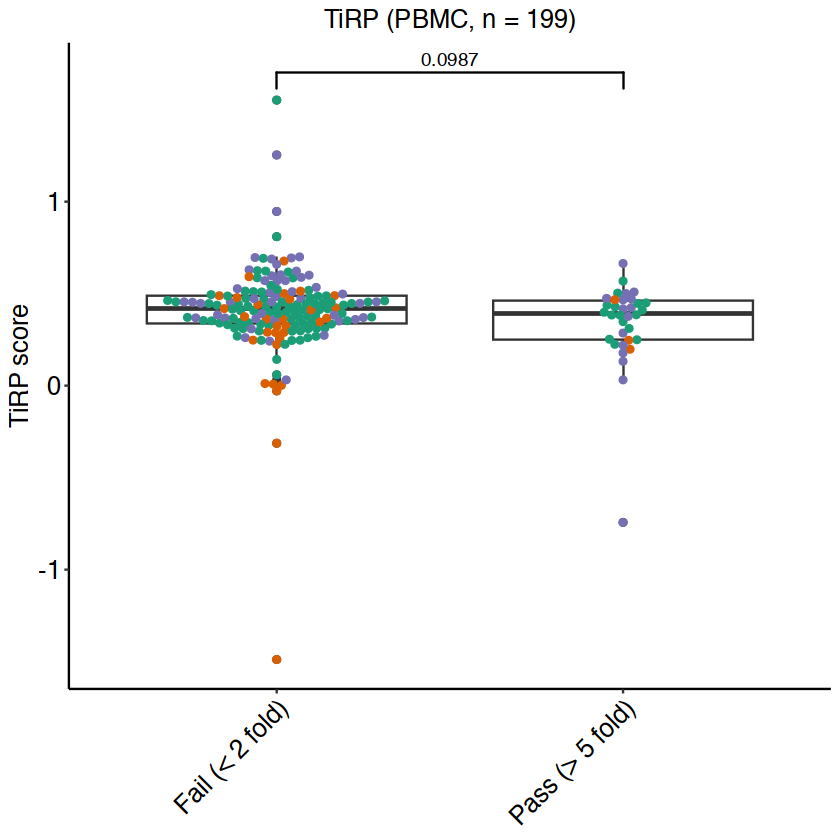

In [51]:
p1

In [52]:
aligned_p <- cowplot::plot_grid(p1, p2, align = "h", nrow = 1)

In [53]:
pdf(paste0(plotpath, "tirp_foldgroups.pdf"), width = 6, height = 6)
aligned_p
dev.off()

pdf 
  2

In [54]:
dd <- datadist(tirp_pbmc[ , c("cycle", "Disease_type", "Age", "cancergroup", "TiRP", "fold_group")])
options(datadist="dd")

In [55]:
f <- ols(TiRP ~ cycle + cancergroup + Age, data = tirp_pbmc)

In [56]:
f

Linear Regression Model

ols(formula = TiRP ~ cycle + cancergroup + Age, data = tirp_pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     199    LR chi2     24.70    R2       0.117    
sigma0.2305    d.f.            7    R2 adj   0.084    
d.f.    191    Pr(> chi2) 0.0009    g        0.092    

Residuals

      Min        1Q    Median        3Q       Max 
-1.636910 -0.076610  0.007564  0.085461  1.233449 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.3659 0.0446  8.20 <0.0001 
cycle=X02                 0.0615 0.0509  1.21 0.2282  
cycle=X03                 0.1389 0.0512  2.71 0.0073  
cycle=X04                 0.0836 0.0534  1.56 0.1193  
cycle=X05                 0.1024 0.0545  1.88 0.0619  
cancergroup=Lymphoma     -0.1350 0.0494 -2.73 0.0069  
cancergroup=Solid tumors  0.0366 0.0376  0.97 0.3311  
Age                      -0.0039 0.0028 -1.41 0.1609  


To do: normalize Tirp by cancergroup

To do: weigh in clonefraction x tirp

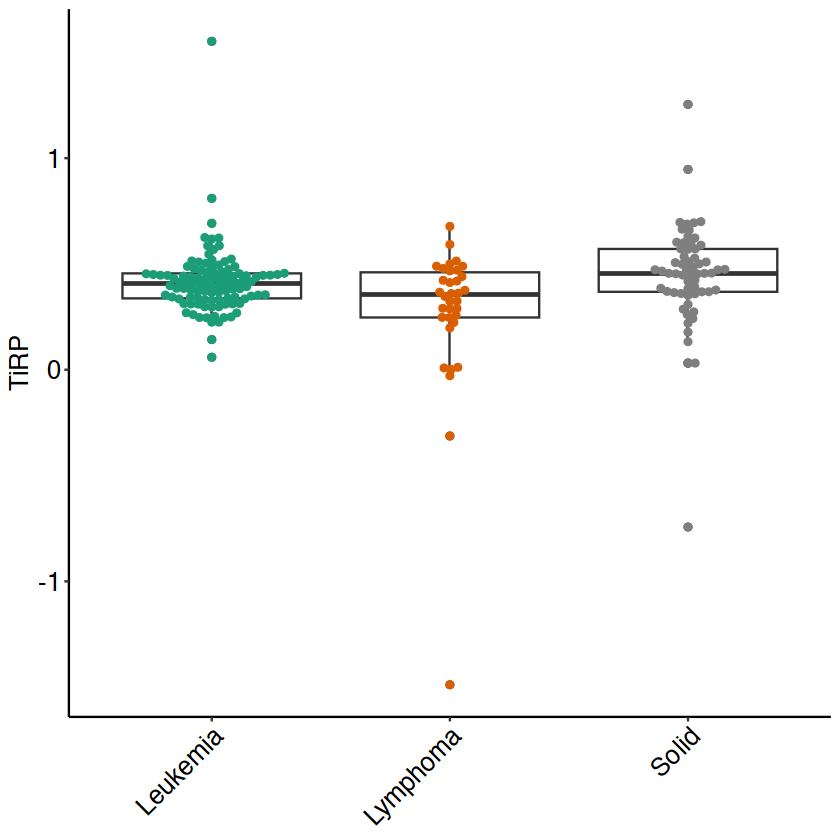

In [103]:
ggplot(
  data = tirp_tmp,
  aes(x = cancergroup, y = TiRP )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) 


In [102]:
f

Linear Regression Model

ols(formula = TiRP ~ cycle + cancergroup + Age, data = tirp_tmp)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     199    LR chi2     24.70    R2       0.117    
sigma0.2305    d.f.            7    R2 adj   0.084    
d.f.    191    Pr(> chi2) 0.0009    g        0.092    

Residuals

      Min        1Q    Median        3Q       Max 
-1.636910 -0.076610  0.007564  0.085461  1.233449 


                     Coef    S.E.   t     Pr(>|t|)
Intercept             0.3659 0.0446  8.20 <0.0001 
cycle=X02             0.0615 0.0509  1.21 0.2282  
cycle=X03             0.1389 0.0512  2.71 0.0073  
cycle=X04             0.0836 0.0534  1.56 0.1193  
cycle=X05             0.1024 0.0545  1.88 0.0619  
cancergroup=Lymphoma -0.1350 0.0494 -2.73 0.0069  
cancergroup=Solid     0.0366 0.0376  0.97 0.3311  
Age                  -0.0039 0.0028 -1.41 0.1609  
